Loading libraries, drive, dataframe

Create bar chart

Sorting and making bar chart prettier

Saving bar chart

Creating histogram

Checking aggregated statistics

Creating scatterplot

Examining values of a column

More granular histogram

Creating a sample of data

Using just the sample

Creating a line chart


**Loading libraries, drive, dataframe**

In [ ]:
## -- Loading Libraries --
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
#Importing google drive#

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the most recent df from drive#
#REMEMBER this is a subset of the whole data#

df = pd.read_pickle('/content/drive/MyDrive/group_aggregate.pkl')

In [ ]:
df.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,...,_merge,price_range_loc,busiest_days,busiest_time,max_order,loyalty_flag,average_order,spending_flag,order_frequency,frequency_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,2907475,96682,prior,23,...,both,Mid-range product,Least busy days,Busiest time,23,Regular customer,5.440000,Low spender,11.5,Regular customer
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,3038506,39081,prior,16,...,both,Mid-range product,Regularly busy days,Regularly busy time,29,Regular customer,9.383333,Low spender,10.5,Regular customer
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,3185203,95847,prior,49,...,both,Mid-range product,Busiest days,Regularly busy time,93,Loyal customer,6.388571,Low spender,4.0,Frequent customer
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,1830804,14910,prior,56,...,both,Mid-range product,Least busy days,Regularly busy time,56,Loyal customer,6.914286,Low spender,5.0,Frequent customer
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,...,both,Mid-range product,Busiest days,Regularly busy time,25,Regular customer,7.580000,Low spender,12.0,Regular customer


**Create bar chart**

<Axes: xlabel='order_dow'>

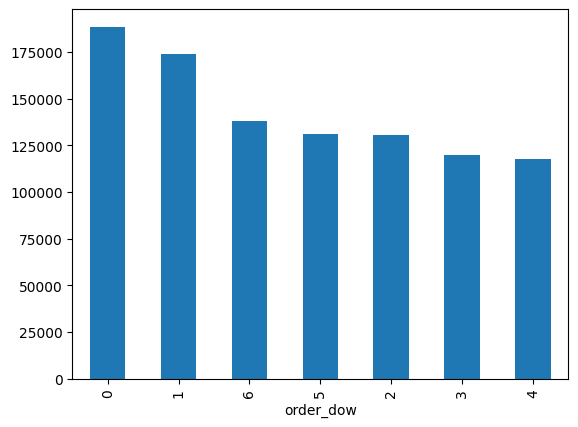

In [ ]:
#creating a bar chart - HISTOGRAM - of number of orders placed on different days of the week#

df['order_dow'].value_counts().plot.bar()

<Axes: xlabel='order_dow'>

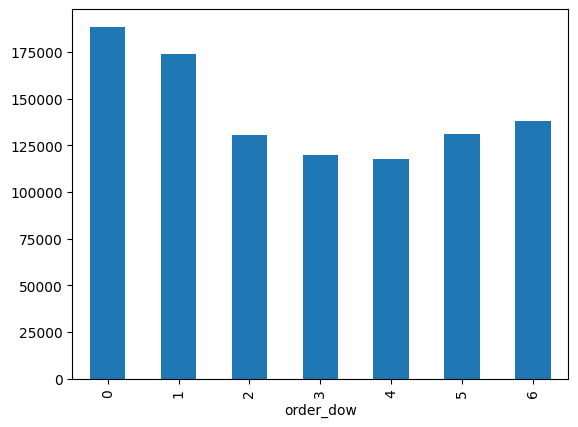

In [ ]:
#Same but sort by day of the week #

df['order_dow'].value_counts().sort_index().plot.bar()

In [ ]:
#NOTE if you leave off the .plot.bar() function you just get values #

df['order_dow'].value_counts().sort_index()

,count
order_dow,
0,188595
1,174155
2,130626
3,119861
4,117948
5,130918
6,137897


**Sorting and making bar chart prettier**

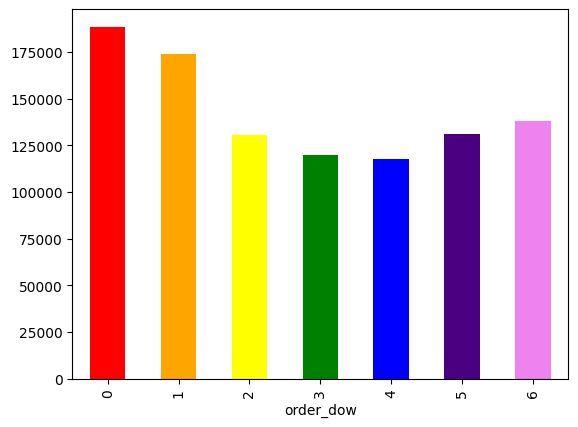

In [ ]:
#Sort by day of the week, now with colour #

bar_plot = df['order_dow'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'])

**Saving bar chart**

In [ ]:
#to save this, make sure google drive is still mounted#

#then define the path#

save_path = '/content/drive/My Drive/Plots/bar_chart.png'

In [ ]:
#then save the bar plot#

#needed gemini to help with this below stage#

# Check if the directory exists and create it if it doesn't
os.makedirs(os.path.dirname(save_path), exist_ok=True)

bar_plot.figure.savefig(save_path, dpi=300)

**Creating histogram**

<Axes: ylabel='Frequency'>

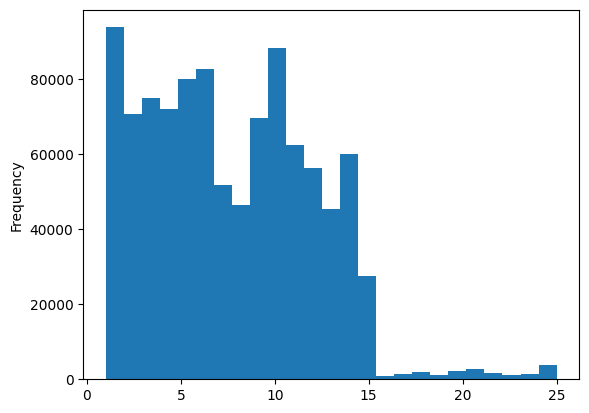

In [ ]:
#A histogram for the 'Prices' column #

#instructing it to create 25 bins #

df['prices'].plot.hist(bins = 25)

Because I am using a subset, I appear to have removed the outlier that the exercise is expecting I will get - will still investigate the data

**Checking aggregated statistics**

In [ ]:
#Checking mean, median, max of prices#

df['prices'].mean()


np.float64(7.687632599999996)

In [ ]:
#to one decimal place without the 'wrapper' #

float(round(df['prices'].mean(), 1))

7.7

In [ ]:
df['prices'].median()

7.2

In [ ]:
df['prices'].max()

25.0

In [ ]:
#can just use .describe() to get there quicker #

df['prices'].describe()

,prices
count,1000000.000000
mean,7.687633
std,4.401544
min,1.000000
25%,4.000000
50%,7.200000
75%,11.000000
max,25.000000


**Creating scatterplot**

<Axes: xlabel='prices', ylabel='prices'>

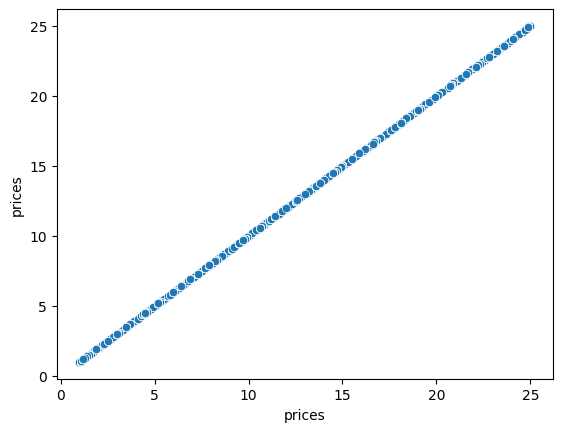

In [ ]:
#scatterplot to see if there are any big outliers #

sns.scatterplot(x = 'prices', y = 'prices',data = df)

No. One continuous line.

**Examining values of a column**

In [ ]:
#Want to have a look at how many values are over 20 in the 'prices' column

df.loc[df['prices'] > 20]

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,...,_merge,price_range_loc,busiest_days,busiest_time,max_order,loyalty_flag,average_order,spending_flag,order_frequency,frequency_flag
1248,39,40,Beef Hot Links Beef Smoked Sausage With Chile ...,106,12,22.5,953624,35821,prior,27,...,both,High-range product,Regularly busy days,Regularly busy time,58,Loyal customer,7.255172,Low spender,5.0,Frequent customer
1249,39,40,Beef Hot Links Beef Smoked Sausage With Chile ...,106,12,22.5,3409643,26513,prior,5,...,both,High-range product,Regularly busy days,Busiest time,6,New customer,11.650000,High spender,2.0,Frequent customer
1250,39,40,Beef Hot Links Beef Smoked Sausage With Chile ...,106,12,22.5,1404366,176080,prior,4,...,both,High-range product,Least busy days,Regularly busy time,10,New customer,11.400000,High spender,30.0,Non-frequent customer
1251,39,40,Beef Hot Links Beef Smoked Sausage With Chile ...,106,12,22.5,430594,35821,prior,52,...,both,High-range product,Busiest days,Regularly busy time,58,Loyal customer,7.255172,Low spender,5.0,Frequent customer
1252,39,40,Beef Hot Links Beef Smoked Sausage With Chile ...,106,12,22.5,2754468,1491,prior,3,...,both,High-range product,Regularly busy days,Regularly busy time,5,New customer,13.050000,High spender,4.0,Frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999841,16907,16907,Honey 1/2 Ham Boneless,49,12,21.6,3408027,185330,prior,17,...,both,High-range product,Regularly busy days,Busiest time,24,Regular customer,8.150000,Low spender,8.0,Frequent customer
999842,16907,16907,Honey 1/2 Ham Boneless,49,12,21.6,72203,17783,prior,22,...,both,High-range product,Regularly busy days,Regularly busy time,56,Loyal customer,10.086667,High spender,6.5,Frequent customer
999843,16907,16907,Honey 1/2 Ham Boneless,49,12,21.6,2881986,72041,prior,9,...,both,High-range product,Regularly busy days,Regularly busy time,19,Regular customer,10.857143,High spender,11.0,Regular customer
999844,16907,16907,Honey 1/2 Ham Boneless,49,12,21.6,2994798,112775,prior,18,...,both,High-range product,Least busy days,Regularly busy time,31,Regular customer,8.800000,Low spender,12.5,Regular customer


10,760 over $20, out of ...

In [ ]:
df

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,...,_merge,price_range_loc,busiest_days,busiest_time,max_order,loyalty_flag,average_order,spending_flag,order_frequency,frequency_flag
0,0,1,Chocolate Sandwich Cookies,61,19,5.8,2907475,96682,prior,23,...,both,Mid-range product,Least busy days,Busiest time,23,Regular customer,5.440000,Low spender,11.5,Regular customer
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,3038506,39081,prior,16,...,both,Mid-range product,Regularly busy days,Regularly busy time,29,Regular customer,9.383333,Low spender,10.5,Regular customer
2,0,1,Chocolate Sandwich Cookies,61,19,5.8,3185203,95847,prior,49,...,both,Mid-range product,Busiest days,Regularly busy time,93,Loyal customer,6.388571,Low spender,4.0,Frequent customer
3,0,1,Chocolate Sandwich Cookies,61,19,5.8,1830804,14910,prior,56,...,both,Mid-range product,Least busy days,Regularly busy time,56,Loyal customer,6.914286,Low spender,5.0,Frequent customer
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,...,both,Mid-range product,Busiest days,Regularly busy time,25,Regular customer,7.580000,Low spender,12.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,16908,16908,Jacob's Wonderbar Dark Roast,26,7,4.5,1503923,48762,prior,5,...,both,Low-range product,Busiest days,Regularly busy time,7,New customer,5.766667,Low spender,27.0,Non-frequent customer
999996,16908,16908,Jacob's Wonderbar Dark Roast,26,7,4.5,332771,101583,prior,4,...,both,Low-range product,Regularly busy days,Busiest time,5,New customer,4.450000,Low spender,22.0,Non-frequent customer
999997,16908,16908,Jacob's Wonderbar Dark Roast,26,7,4.5,290484,7492,prior,23,...,both,Low-range product,Busiest days,Regularly busy time,37,Regular customer,8.728000,Low spender,9.0,Frequent customer
999998,16908,16908,Jacob's Wonderbar Dark Roast,26,7,4.5,1905323,49098,prior,10,...,both,Low-range product,Busiest days,Busiest time,13,Regular customer,5.875000,Low spender,6.0,Frequent customer


...out of 1,000,000

In [ ]:
#If had extreme outliers, could use this to replace with NaN #

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

Can set the value at whatever you like

**More granular histogram**

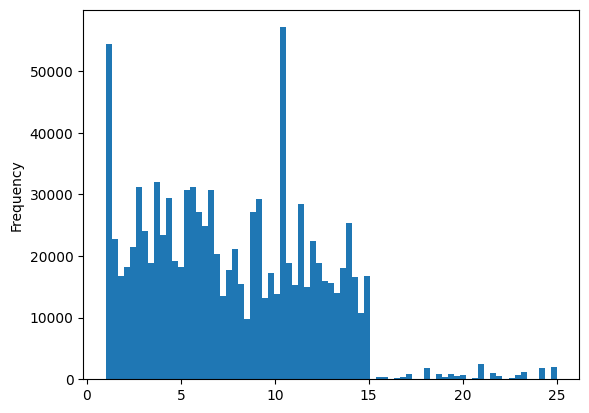

In [ ]:
#A more granular histogram for the 'Prices' column #

#instructing it to create 75 bins - so each one is much thinner #

hist_75 = df['prices'].plot.hist(bins = 75)

In [ ]:
#to save this, make sure google drive is still mounted#

#then define the path#

save_path = '/content/drive/My Drive/Plots/hist_chart.png'

In [ ]:
#then save the hist plot#

hist_75.figure.savefig(save_path, dpi=300)

Is saved next to the bar chart

MOVING INTO SAMPLING NOW

**Creating a sample of data**

In [ ]:
#To create a sample first need a "seed" which can be reproduced down the line #
#so doesn't matter that I choose '4', just as long as I know that#'s what I chose

#then create a new column 'dev' which is 'True' when the random we assign to every row is less than 0.7#

#(in other words we have splits the data 70/30 - can then later be: 70% train and 30% test#

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [ ]:
#that's assigend Boolean values to all rows, so lets' look at 'dev'#
dev

array([False,  True, False, ..., False,  True, False])

In [ ]:
# and let's look at the releatvie % of Booleabs in dev#

percentages = pd.Series(dev).value_counts(normalize=True) * 100
print(percentages)

True     69.9239
False    30.0761
Name: proportion, dtype: float64


So, it's not precisely 70:30, but it is very close - maybe as exepct with randomisation



**Using just the sample**

In [ ]:
#Now we can actually split the data#

#this creates 2 data sets; big where dev = true (70%) and small where dev = false (30%)

big = df[dev]
small = df[~dev]

In [ ]:
#looking at big

big

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,...,_merge,price_range_loc,busiest_days,busiest_time,max_order,loyalty_flag,average_order,spending_flag,order_frequency,frequency_flag
1,0,1,Chocolate Sandwich Cookies,61,19,5.8,3038506,39081,prior,16,...,both,Mid-range product,Regularly busy days,Regularly busy time,29,Regular customer,9.383333,Low spender,10.5,Regular customer
4,0,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,...,both,Mid-range product,Busiest days,Regularly busy time,25,Regular customer,7.580000,Low spender,12.0,Regular customer
5,0,1,Chocolate Sandwich Cookies,61,19,5.8,1157193,146872,prior,61,...,both,Mid-range product,Regularly busy days,Regularly busy time,98,Loyal customer,10.943478,High spender,2.0,Frequent customer
7,0,1,Chocolate Sandwich Cookies,61,19,5.8,1618214,125644,prior,11,...,both,Mid-range product,Busiest days,Regularly busy time,11,Regular customer,5.800000,Low spender,7.0,Frequent customer
8,0,1,Chocolate Sandwich Cookies,61,19,5.8,1136196,84766,prior,40,...,both,Mid-range product,Regularly busy days,Busiest time,40,Regular customer,3.933333,Low spender,3.5,Frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,16908,16908,Jacob's Wonderbar Dark Roast,26,7,4.5,475611,92820,prior,3,...,both,Low-range product,Busiest days,Regularly busy time,23,Regular customer,6.218182,Low spender,11.0,Regular customer
999993,16908,16908,Jacob's Wonderbar Dark Roast,26,7,4.5,1230636,89175,prior,17,...,both,Low-range product,Regularly busy days,Regularly busy time,35,Regular customer,8.392000,Low spender,7.0,Frequent customer
999994,16908,16908,Jacob's Wonderbar Dark Roast,26,7,4.5,3262346,204630,prior,9,...,both,Low-range product,Busiest days,Regularly busy time,9,New customer,7.100000,Low spender,5.5,Frequent customer
999995,16908,16908,Jacob's Wonderbar Dark Roast,26,7,4.5,1503923,48762,prior,5,...,both,Low-range product,Busiest days,Regularly busy time,7,New customer,5.766667,Low spender,27.0,Non-frequent customer


Can see it has: 699239 rows - exactly what we expected because: True     69.9239%

In [ ]:
#another good check is to make sure that Big + small = whole df #

len(df)

1000000

In [ ]:
len(big) + len (small)

1000000

In [ ]:
#Create a smaller dataframe of just the columns we need #

df_2 = small[['order_dow','prices']]

In [ ]:
#checxk that looks right#

df_2

,order_dow,prices
0,4,5.8
2,1,5.8
3,4,5.8
6,0,5.8
10,3,5.8
...,...,...
999987,2,4.5
999990,2,4.5
999996,6,4.5
999997,0,4.5


**Creating a line chart**

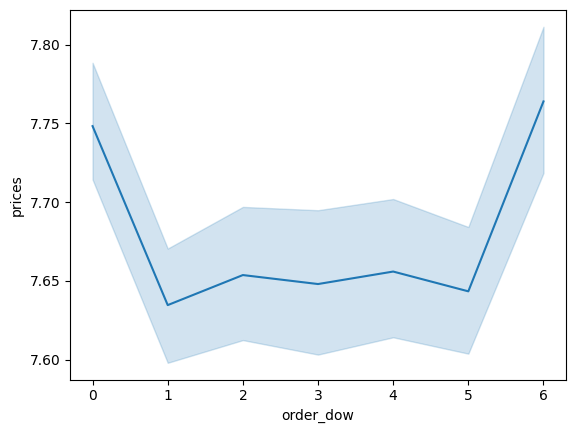

In [ ]:
#create a line chart#

line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

translucent blue bands  are called error bands, and they represent the chart’s confidence intervals. In other words, if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the error bands.

In [ ]:
#since we only have 1,000,000 rows in my sample, SHOULD be able to compare to who dataset #

#Create a smaller dataframe of just the columns we need #

df_3 = df[['order_dow','prices']]

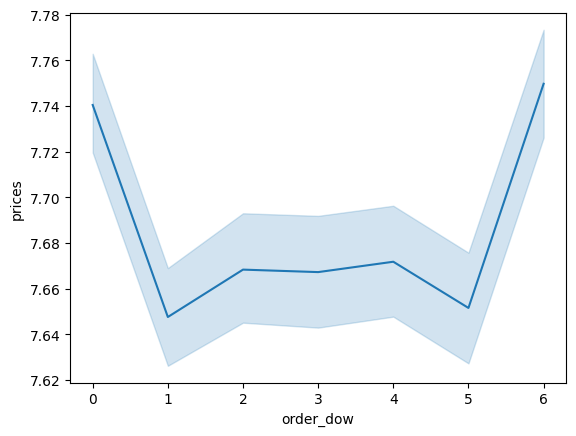

In [ ]:
#create a line chart#

line = sns.lineplot(data = df_3, x = 'order_dow',y = 'prices')

We can, and we can see it looks VERY similar to that from just the sample - so the sampling worked!